In [2]:
import pandas as pd
import serum_metabolites as sm
import shared_types as ty
import shared_functions as fu
import significant_metabolites_sex as significant

In [3]:
sm.plot_hist_kde(
    metabolite_group=ty.MetaboliteGroup.All,
    hue=ty.FilterColor.Diagnosis,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.Normal,
    end_diagnosis=ty.Diagnosis.All,
    biological_sex=ty.BioSex.All,
    color_config=ty.FilterColor.Diagnosis
    
)

KeyError: "['C1_0', 'C2_0', 'C3_0', 'C4_0', 'X2_HYDROXYBUTYRIC_ACID', 'X3_HYDROXYBUTYRIC_ACID', 'ISOBUTYRIC_ACID', 'C6_0', 'C7_0', 'C8_0', 'C9_0', 'C10_0', 'C11_0', 'C11_1_CIS_10', 'C12_0', 'C13_0', 'C14_0', 'C15_0', 'C16_0', 'C16_1_CIS_9', 'C17_0', 'C17_1_CIS_10', 'C18_0', 'C18_1_CIS_9', 'C18_2_CIS_9_12', 'C18_3_CIS_6_9_12', 'C18_3_CIS_9_12_15', 'C19_2_CIS_10_13', 'C20_2_CIS_11_14', 'C20_3_CIS_8_11_14', 'C20_4_CIS_5_8_11_14', 'C20_5_CIS_5_8_11_14_17', 'C22_6_CIS_4_7_10_13_16_19', 'C22_4_CIS_7_10_13_16', 'C22_5_CIS_4_7_10_13_16', 'C22_5_CIS_7_10_13_16_19', 'L_HISTIDINE', 'L_LYSINE', 'L_SERINE', 'BETA_ALANINE', 'L_ALANINE', 'L_TYROSINE', 'L_ASPARAGINE', 'L_ASPARTIC_ACID', 'GLYCINE', 'L_PROLINE', 'L_ALPHA_AMINOBUTYRIC_ACID', 'PYROGLUTAMIC_ACID', 'L_VALINE', 'L_METHIONINE', 'L_LEUCINE', 'L_TRYPTOPHAN', 'HIPPURIC_ACID', 'L_MALIC_ACID', 'ADIPIC_ACID', 'GLYCERIC_ACID', 'GLYCOLIC_ACID', 'CIS_ACONITIC_ACID', 'METHYLSUCCINIC_ACID', 'ISOCITRIC_ACID', 'CITRIC_ACID', 'OXOGLUTARIC_ACID', 'INDOLEACETIC_ACID', 'X3_INDOLEPROPIONIC_ACID', 'X3_METHYL_2_OXOVALERIC_ACID', 'CA', 'CDCA', 'DCA', 'LCA', 'DEHYDROLCA', 'UDCA', 'UCA', 'BUDCA', 'X12_KETOLCA', 'X7_KETOLCA', 'X3_DHCA', 'X7_DHCA', 'GCA', 'GCDCA', 'GDCA', 'GLCA', 'GUDCA', 'GHCA', 'GHDCA', 'TCA', 'TCDCA', 'TDCA', 'TUDCA', 'TAMCA', 'ALLOLCA', 'ISOLCA', 'MUROCA', 'NORCA', 'NORDCA', 'APOCA', 'LCA_3S', 'P_CRESOL_SULFATE', 'HCA', 'HDCA', 'SUBERIC_ACID', 'SUCCINIC_ACID', 'X3_HYDROXYISOVALERIC_ACID', 'X__2_METHYLPENTANOIC_ACID', 'C5_0'] not in index"

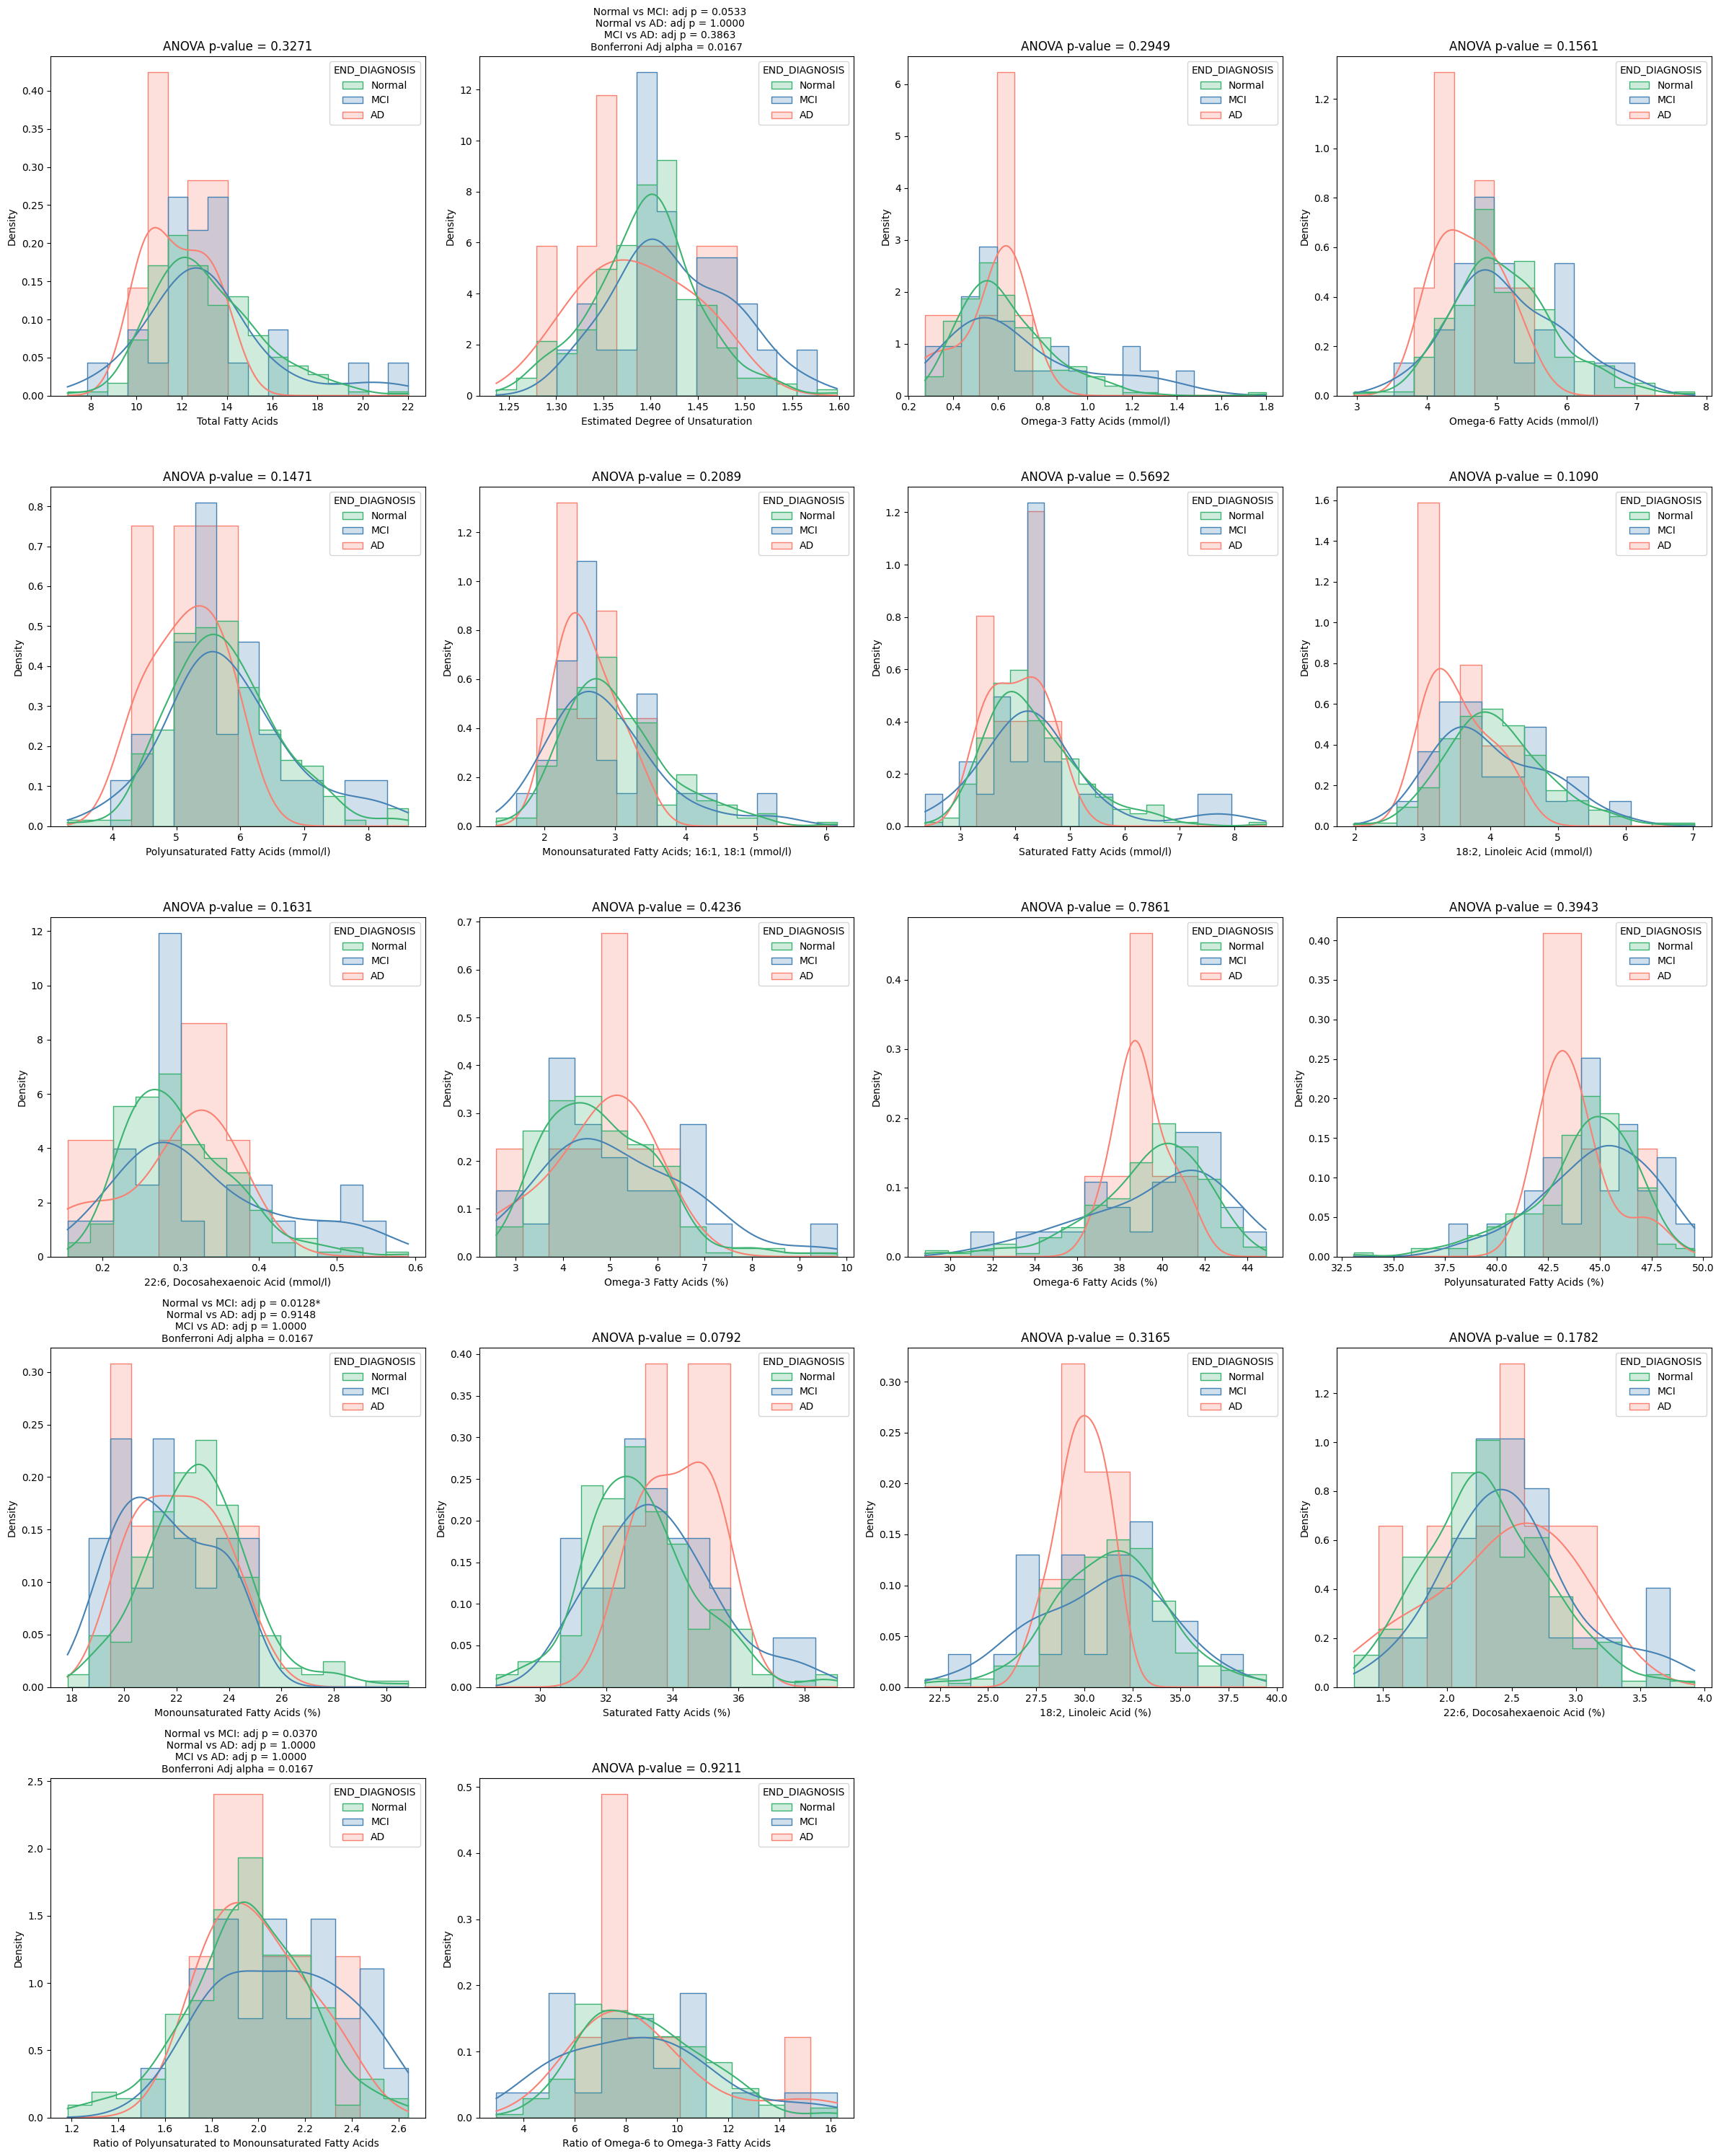

In [4]:
sm.plot_hist_kde(
    metabolite_group=ty.MetaboliteGroup.SerumFattyAcids,
    hue=ty.FilterColor.Diagnosis,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.Normal,
    biological_sex=ty.BioSex.Female,
    color_config=ty.FilterColor.Diagnosis,
)

In [ ]:
sm.plot_hist_kde(
    metabolite_group=ty.MetaboliteGroup.SerumSLDL,
    hue=ty.FilterColor.Diagnosis,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.Normal,
    biological_sex=ty.BioSex.Male,
    color_config=ty.FilterColor.Diagnosis,
)

In [2]:
normal_baseline = fu.add_enddx_total_to_baseline(
    metabolites="serum_metabolites_long.csv",
    diagnoses="All_Subjects_DXSUM_08Oct2024.csv",
    gender="ADNIMERGE_08Oct2024.csv",
    metabolite_group=ty.MetaboliteGroup.SerumAll,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.Normal,
    end_diagnosis=ty.Diagnosis.All,
)

mci_baseline = fu.add_enddx_total_to_baseline(
    metabolites="serum_metabolites_long.csv",
    diagnoses="All_Subjects_DXSUM_08Oct2024.csv",
    gender="ADNIMERGE_08Oct2024.csv",
    metabolite_group=ty.MetaboliteGroup.SerumAll,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.MCI,
    end_diagnosis=ty.Diagnosis.All,
)

ad_baseline = fu.add_enddx_total_to_baseline(
    metabolites="serum_metabolites_long.csv",
    diagnoses="All_Subjects_DXSUM_08Oct2024.csv",
    gender="ADNIMERGE_08Oct2024.csv",
    metabolite_group=ty.MetaboliteGroup.SerumAll,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.AD,
    end_diagnosis=ty.Diagnosis.All,
)

baseline = pd.concat([normal_baseline, mci_baseline, ad_baseline])

start_diagnosis_map = {1.0: "Normal Baseline", 2.0: "MCI Baseline", 3.0: "AD Baseline"}
baseline["start_diagnosis"] = baseline["DIAGNOSIS"].map(start_diagnosis_map)


In [3]:
data = baseline.loc[baseline["DIAGNOSIS"] == 1.0]

In [ ]:
fu.plot_sunburst_dist(data=baseline, path=["start_diagnosis", "END_DIAGNOSIS"])

In [ ]:
fu.plot_sunburst_dist(data=data, path=["PTGENDER", "start_diagnosis"])

In [ ]:
fu.plot_sunburst_dist(data=data, path=["PTGENDER","END_DIAGNOSIS"], color_sequence=["salmon","steelblue"])

In [13]:
results = sm.display_effect_sizes_and_cohens(metabolite_group=["MUFA_PCT"],
hue=ty.FilterColor.Diagnosis,
sample_source=ty.Sample.Serum,
start_diagnosis=ty.Diagnosis.Normal,
end_diagnosis=ty.Diagnosis.All,
biological_sex=ty.BioSex.Female,
)

In [ ]:
results

In [ ]:
sm.plot_age_vs_variable(
    metabolite_group=ty.MetaboliteGroup.SerumIDL,
    hue=ty.FilterColor.Sex,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.Normal,
    end_diagnosis=ty.Diagnosis.Normal,
    biological_sex=ty.BioSex.All,
)

In [ ]:
sm.plot_age_vs_variable(
    metabolite_group=ty.MetaboliteGroup.SerumLHDL,
    hue=ty.FilterColor.Diagnosis,
    sample_source=ty.Sample.Serum,
    start_diagnosis=ty.Diagnosis.Normal,
    end_diagnosis=ty.Diagnosis.All,
    biological_sex=ty.BioSex.All,
    color_config=ty.FilterColor.Diagnosis,
)